# **Data modelling** / Training & Error analysis

**Importing libraries**

In [33]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score , plot_confusion_matrix,cohen_kappa_score

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Loading the dataset**

In [34]:
reservas = pd.read_csv(r'../data/rvas_ok.csv', index_col = 0, low_memory=False)

In [35]:
reservas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33156 entries, 0 to 36606
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Cancelled               33156 non-null  int64  
 1   Arrival                 33156 non-null  object 
 2   Arrival month           33156 non-null  int64  
 3   Departure               33156 non-null  object 
 4   Length of the stay      33156 non-null  int64  
 5   Creation date           33156 non-null  object 
 6   Lead time               33156 non-null  int64  
 7   Cancellation date       33156 non-null  object 
 8   Cxl time                33156 non-null  float64
 9   Cancellation lead time  33156 non-null  float64
 10  Stay type               33156 non-null  object 
 11  Room type               33156 non-null  object 
 12  Meal                    33156 non-null  object 
 13  N of pax                33156 non-null  int64  
 14  Non Refundable          33156 non-null

**Dropping columns**

In [36]:
reservas.columns

Index(['Cancelled', 'Arrival', 'Arrival month', 'Departure',
       'Length of the stay', 'Creation date', 'Lead time', 'Cancellation date',
       'Cxl time', 'Cancellation lead time', 'Stay type', 'Room type', 'Meal',
       'N of pax', 'Non Refundable', 'VIP', 'Country', 'Market channel',
       'Channel'],
      dtype='object')

In [37]:
reservas = reservas.drop(columns=['Arrival','Departure','Creation date','Cancellation date','Cxl time', 'Cancellation lead time'],axis=1)

In [38]:
reservas.head()

,Cancelled,Arrival month,Length of the stay,Lead time,Stay type,Room type,Meal,N of pax,Non Refundable,VIP,Country,Market channel,Channel
0,1,1,6,158,L-W-L,Double Standard,BB,1,0,0,Other,OTA,XML
2,1,1,2,85,L-L,Triple Standard,BB,3,0,0,United Kingdom,TTOO,EMAIL
3,1,1,12,76,W-L,Double Standard,BB,2,0,0,Other,OTA,XML
4,1,1,5,50,W-L,Double Standard,BB,2,0,0,Other,TTOO,EMAIL
5,1,1,5,49,W-L,Double Standard,BB,2,0,0,Other,TTOO,EMAIL


---

# **One Hot Encoding**

In [39]:
reservas = pd.get_dummies(reservas,drop_first=True)

In [40]:
reservas.shape

(33156, 35)

# **Data splitting**

In [41]:
X = reservas.drop('Cancelled',axis=1)

y = reservas['Cancelled']

In [42]:
X

,Arrival month,Length of the stay,Lead time,N of pax,Non Refundable,VIP,Stay type_L-W,Stay type_L-W-L,Stay type_W-L,Stay type_W-W,...,Market channel_GDS,Market channel_Hotel deal apps,Market channel_OTA,Market channel_TTOO,Market channel_Travel agency,Channel_GDS,Channel_MICE,Channel_Other,Channel_WEB,Channel_XML
0,1,6,158,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,2,85,3,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,1,12,76,2,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,1,5,50,2,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,1,5,49,2,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36602,12,1,32,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
36603,12,1,32,2,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
36604,12,1,8,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36605,12,1,6,2,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [44]:
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)

---

# **Scalling features**

In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer

In [46]:
stan = StandardScaler()
minmax = MinMaxScaler()
robus = RobustScaler()
power = PowerTransformer()

In [47]:
#------------------------------------------------#


stan.fit(X_train)

X_train_stan = stan.transform(X_train)
X_test_stan = stan.transform(X_test)

X_train_stan = pd.DataFrame(X_train_stan,columns=X.columns)
X_test_stan = pd.DataFrame(X_test_stan,columns=X.columns)
#------------------------------------------------#



minmax.fit(X_train)

X_train_minmax = minmax.transform(X_train)
X_test_minmax = minmax.transform(X_test)

X_train_minmax = pd.DataFrame(X_train_minmax,columns=X.columns)
X_test_minmax = pd.DataFrame(X_test_minmax,columns=X.columns)

#------------------------------------------------#


robus.fit(X_train)

X_train_robus = robus.transform(X_train)
X_test_robus = robus.transform(X_test)

X_train_robus = pd.DataFrame(X_train_robus,columns=X.columns)
X_test_robus  = pd.DataFrame(X_test_robus ,columns=X.columns)

#------------------------------------------------#


power.fit(X_train)

X_train_power = power.transform(X_train)
X_test_power = power.transform(X_test)

X_train_power = pd.DataFrame(X_train_power,columns=X.columns)
X_test_power = pd.DataFrame(X_test_power,columns=X.columns)

---

**List of X train / test scaled**

In [48]:
train = [X_train_stan,X_train_minmax,X_train_robus,X_train_power]

test = [X_test_stan,X_test_minmax,X_test_robus,X_test_power]

---

# **LogisticRegression**

In [49]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(X_train_stan, y_train)

y_predict_train = log.predict(X_train_stan)
y_predict_test = log.predict(X_test_stan)

---

## **Confusion matrix**

**Train set** + StandarScaler

The accuracy score of the train set is:............ 0.842444578494948
The f1 score of the train set is:............ 0.44018754186202275
The recall score of the train set is:............ 0.33469138317376246
The precision score of the train set is:............ 0.6428012519561815
The cohen-kappa score of the train set is:............ 0.3589392512912096


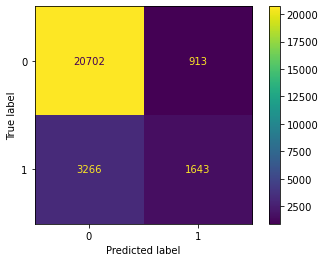

In [50]:
plot_confusion_matrix(log, X_train_stan, y_train) 

print('The accuracy score of the train set is:............',accuracy_score(y_train, y_predict_train))
print('The f1 score of the train set is:............',f1_score(y_train, y_predict_train))
print('The recall score of the train set is:............',recall_score(y_train, y_predict_train))
print('The precision score of the train set is:............',precision_score(y_train, y_predict_train))
print('The cohen-kappa score of the train set is:............',cohen_kappa_score(y_train, y_predict_train))

---

**Test set** + StandardScaler

The accuracy score of the test set is:............ 0.8431845597104946
The f1 score of the test set is:............ 0.4583333333333333
The recall score of the test set is:............ 0.3467297084318361
The precision score of the test set is:............ 0.6758832565284179
The cohen-kappa score of the test set is:............ 0.37756932867030124


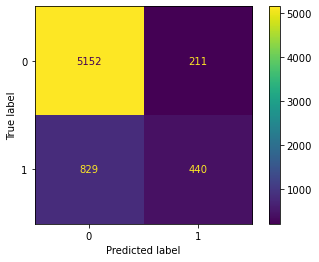

In [51]:
plot_confusion_matrix(log, X_test_stan, y_test)  

print('The accuracy score of the test set is:............',accuracy_score(y_test, y_predict_test))
print('The f1 score of the test set is:............',f1_score(y_test, y_predict_test))
print('The recall score of the test set is:............',recall_score(y_test, y_predict_test))
print('The precision score of the test set is:............',precision_score(y_test, y_predict_test))
print('The cohen-kappa score of the test set is:............',cohen_kappa_score(y_test, y_predict_test))


---

# **KNNeighborsClassifier**

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
neigh = KNeighborsClassifier(n_neighbors = 3)

neigh.fit(X_train_stan, y_train)

y_predict_train = neigh.predict(X_train_stan)
y_predict_test = neigh.predict(X_test_stan)

---

## **Confusion matrix**

**Train set** + StandardScaler

The accuracy score of the train set is:............ 0.9074423163927009
The f1 score of the train set is:............ 0.726218356194937
The recall score of the train set is:............ 0.6632715420655938
The precision score of the train set is:............ 0.8023656973878758
The cohen-kappa score of the train set is:............ 0.6711279694453813


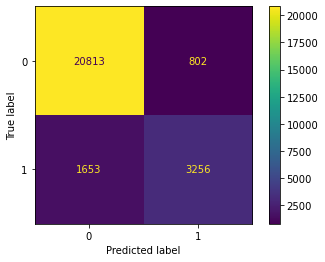

In [54]:
plot_confusion_matrix(neigh, X_train_stan, y_train) 

print('The accuracy score of the train set is:............',accuracy_score(y_train, y_predict_train))
print('The f1 score of the train set is:............',f1_score(y_train, y_predict_train))
print('The recall score of the train set is:............',recall_score(y_train, y_predict_train))
print('The precision score of the train set is:............',precision_score(y_train, y_predict_train))
print('The cohen-kappa score of the train set is:............',cohen_kappa_score(y_train, y_predict_train))

---

**Test set** + StandardScaler

The accuracy score of the test set is:............ 0.8416767189384801
The f1 score of the test set is:............ 0.541083916083916
The recall score of the test set is:............ 0.48778565799842394
The precision score of the test set is:............ 0.6074582924435721
The cohen-kappa score of the test set is:............ 0.44679742931922783


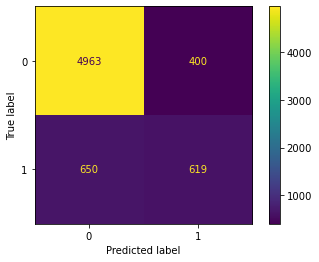

In [55]:
plot_confusion_matrix(neigh, X_test_stan, y_test)  

print('The accuracy score of the test set is:............',accuracy_score(y_test, y_predict_test))
print('The f1 score of the test set is:............',f1_score(y_test, y_predict_test))
print('The recall score of the test set is:............',recall_score(y_test, y_predict_test))
print('The precision score of the test set is:............',precision_score(y_test, y_predict_test))
print('The cohen-kappa score of the test set is:............',cohen_kappa_score(y_test, y_predict_test))

---

## **Best number of K** and all the scalers

In [56]:
type(train)   # List of X_train trained with all the transformers

list

In [57]:
type(test)    # List of X_test trained with all the transformers

list

In [58]:
#train = [X_train_stan,X_train_minmax,X_train_robus,X_train_power]

#test = [X_test_stan,X_test_minmax,X_test_robus,X_test_power]


y_pred_trn_list = []
y_pred_trn_test_list = []


for i in range(3,22,2):

    print("Trying to train a K-NN with {} neighbours: ".format(i))
    
    neigh = KNeighborsClassifier(n_neighbors = i)
    
    for x_trn,x_tst in zip(train,test):
        
        neigh.fit(x_trn, y_train)
        
        y_predict_trn = neigh.predict(x_trn)
        y_pred_trn_list.append(y_predict_trn)
        
        y_predict_tst = neigh.predict(x_tst)
        y_pred_trn_test_list.append(y_predict_tst) 
        
        

Trying to train a K-NN with 3 neighbours: 
Trying to train a K-NN with 5 neighbours: 
Trying to train a K-NN with 7 neighbours: 
Trying to train a K-NN with 9 neighbours: 
Trying to train a K-NN with 11 neighbours: 
Trying to train a K-NN with 13 neighbours: 
Trying to train a K-NN with 15 neighbours: 
Trying to train a K-NN with 17 neighbours: 
Trying to train a K-NN with 19 neighbours: 
Trying to train a K-NN with 21 neighbours: 


In [59]:


#train = [X_train_stan,X_train_minmax,X_train_robus,X_train_power]

scalers = ['standard_scaler','minmax_scaler','robust_scaler','power_transformer']

counter = 0 
max_recall = 0 

for i in range(3,22,2):
    
    for scal in scalers:
        
        recall_iteration = recall_score(y_test, y_pred_trn_test_list[counter])
        cohen_iteration = cohen_kappa_score(y_test, y_pred_trn_test_list[counter])

        print("Model performance K-NN with",i," neighbours & ", scal)
        
        #print('The accuracy score of the test set is:............',accuracy_score(y_test, y_pred_trn_test_list[counter]))

        #print('The f1 score of the test set is:............',f1_score(y_test, y_pred_trn_test_list[counter]))

        print('The recall score of the test set is:............',recall_iteration)

        #print('The precision score of the test set is:............',precision_score(y_test, y_pred_trn_test_list[counter]))

        print('The cohen-kappa score of the test set is:............',cohen_iteration)

        print('....................................................................................')
        counter+= 1
        if recall_iteration > max_recall :
            max_recall = recall_iteration
            print('MAX SPOTTED ')
        
   

Model performance K-NN with 3  neighbours &  standard_scaler
The recall score of the test set is:............ 0.48778565799842394
The cohen-kappa score of the test set is:............ 0.44679742931922783
....................................................................................
MAX SPOTTED 
Model performance K-NN with 3  neighbours &  minmax_scaler
The recall score of the test set is:............ 0.48699763593380613
The cohen-kappa score of the test set is:............ 0.45131824929785214
....................................................................................
Model performance K-NN with 3  neighbours &  robust_scaler
The recall score of the test set is:............ 0.49487785657998423
The cohen-kappa score of the test set is:............ 0.4496713139074562
....................................................................................
MAX SPOTTED 
Model performance K-NN with 3  neighbours &  power_transformer
The recall score of the test set is:............ 

Model performance K-NN with 19  neighbours &  power_transformer
The recall score of the test set is:............ 0.37746256895193064
The cohen-kappa score of the test set is:............ 0.3964637525234629
....................................................................................
Model performance K-NN with 21  neighbours &  standard_scaler
The recall score of the test set is:............ 0.3640661938534279
The cohen-kappa score of the test set is:............ 0.3937907778415153
....................................................................................
Model performance K-NN with 21  neighbours &  minmax_scaler
The recall score of the test set is:............ 0.37115839243498816
The cohen-kappa score of the test set is:............ 0.39923776715130577
....................................................................................
Model performance K-NN with 21  neighbours &  robust_scaler
The recall score of the test set is:............ 0.3475177304964539
The c

In [60]:
'''Model performance K-NN with 3  neighbours &  standard_scaler
The recall score of the test set is:............ 0.48857368006304175
The cohen-kappa score of the test set is:............ 0.44508010984627766
....................................................................................
MAX SPOTTED 
Model performance K-NN with 3  neighbours &  minmax_scaler
The recall score of the test set is:............ 0.48699763593380613
The cohen-kappa score of the test set is:............ 0.4509681325432783
....................................................................................
Model performance K-NN with 3  neighbours &  robust_scaler
The recall score of the test set is:............ 0.491725768321513
The cohen-kappa score of the test set is:............ 0.45032559597419597
....................................................................................
MAX SPOTTED 
Model performance K-NN with 3  neighbours &  power_transformer
The recall score of the test set is:............ 0.4830575256107171
The cohen-kappa score of the test set is:............ 0.44151077109226256
....................................................................................
Model performance K-NN with 5  neighbours &  standard_scaler
The recall score of the test set is:............ 0.438140267927502
The cohen-kappa score of the test set is:............ 0.4360509221048381
....................................................................................
Model performance K-NN with 5  neighbours &  minmax_scaler
The recall score of the test set is:............ 0.44602048857368004
The cohen-kappa score of the test set is:............ 0.45085043908315525
....................................................................................
Model performance K-NN with 5  neighbours &  robust_scaler
The recall score of the test set is:............ 0.45468873128447596
The cohen-kappa score of the test set is:............ 0.4494964065121497
....................................................................................
Model performance K-NN with 5  neighbours &  power_transformer
The recall score of the test set is:............ 0.4515366430260047
The cohen-kappa score of the test set is:............ 0.44291866077905295
....................................................................................
Model performance K-NN with 7  neighbours &  standard_scaler
The recall score of the test set is:............ 0.41213553979511425
The cohen-kappa score of the test set is:............ 0.4248108887378359
....................................................................................
Model performance K-NN with 7  neighbours &  minmax_scaler
The recall score of the test set is:............ 0.42080378250591016
The cohen-kappa score of the test set is:............ 0.43032996638056487
....................................................................................
Model performance K-NN with 7  neighbours &  robust_scaler
The recall score of the test set is:............ 0.41843971631205673
The cohen-kappa score of the test set is:............ 0.43023625521977527
....................................................................................
Model performance K-NN with 7  neighbours &  power_transformer
The recall score of the test set is:............ 0.42868400315208827
The cohen-kappa score of the test set is:............ 0.43832603993488883
....................................................................................
Model performance K-NN with 9  neighbours &  standard_scaler
The recall score of the test set is:............ 0.3900709219858156
The cohen-kappa score of the test set is:............ 0.40624889504942074
....................................................................................
Model performance K-NN with 9  neighbours &  minmax_scaler
The recall score of the test set is:............ 0.3979511426319937
The cohen-kappa score of the test set is:............ 0.4163225869852393
....................................................................................
Model performance K-NN with 9  neighbours &  robust_scaler
The recall score of the test set is:............ 0.3892828999211978
The cohen-kappa score of the test set is:............ 0.40986694422492853
....................................................................................
Model performance K-NN with 9  neighbours &  power_transformer
The recall score of the test set is:............ 0.41843971631205673
The cohen-kappa score of the test set is:............ 0.4354173473916455
....................................................................................
Model performance K-NN with 11  neighbours &  standard_scaler
The recall score of the test set is:............ 0.3806146572104019
The cohen-kappa score of the test set is:............ 0.4059202170059032
....................................................................................
Model performance K-NN with 11  neighbours &  minmax_scaler
The recall score of the test set is:............ 0.4026792750197006
The cohen-kappa score of the test set is:............ 0.4232436630288925
....................................................................................
Model performance K-NN with 11  neighbours &  robust_scaler
The recall score of the test set is:............ 0.3798266351457841
The cohen-kappa score of the test set is:............ 0.4029018079346295
....................................................................................
Model performance K-NN with 11  neighbours &  power_transformer
The recall score of the test set is:............ 0.38849487785658
The cohen-kappa score of the test set is:............ 0.4101823774255188
....................................................................................
Model performance K-NN with 13  neighbours &  standard_scaler
The recall score of the test set is:............ 0.3829787234042553
The cohen-kappa score of the test set is:............ 0.40943201867877466
....................................................................................
Model performance K-NN with 13  neighbours &  minmax_scaler
The recall score of the test set is:............ 0.40583136327817176
The cohen-kappa score of the test set is:............ 0.4267397510848686
....................................................................................
Model performance K-NN with 13  neighbours &  robust_scaler
The recall score of the test set is:............ 0.3750985027580772
The cohen-kappa score of the test set is:............ 0.39993695590415734
....................................................................................
Model performance K-NN with 13  neighbours &  power_transformer
The recall score of the test set is:............ 0.39322301024428685
The cohen-kappa score of the test set is:............ 0.4149282440558939
....................................................................................
Model performance K-NN with 15  neighbours &  standard_scaler
The recall score of the test set is:............ 0.3814026792750197
The cohen-kappa score of the test set is:............ 0.4078335047287108
....................................................................................
Model performance K-NN with 15  neighbours &  minmax_scaler
The recall score of the test set is:............ 0.3955870764381403
The cohen-kappa score of the test set is:............ 0.42176322617870354
....................................................................................
Model performance K-NN with 15  neighbours &  robust_scaler
The recall score of the test set is:............ 0.3680063041765169
The cohen-kappa score of the test set is:............ 0.3948906185721214
....................................................................................
Model performance K-NN with 15  neighbours &  power_transformer
The recall score of the test set is:............ 0.3955870764381403
The cohen-kappa score of the test set is:............ 0.41507305155049234
....................................................................................
Model performance K-NN with 17  neighbours &  standard_scaler
The recall score of the test set is:............ 0.3656422379826635
The cohen-kappa score of the test set is:............ 0.3969050262385332
....................................................................................
Model performance K-NN with 17  neighbours &  minmax_scaler
The recall score of the test set is:............ 0.3814026792750197
The cohen-kappa score of the test set is:............ 0.41156311116090605
....................................................................................
Model performance K-NN with 17  neighbours &  robust_scaler
The recall score of the test set is:............ 0.36012608353033887
The cohen-kappa score of the test set is:............ 0.3897116442445667
....................................................................................
Model performance K-NN with 17  neighbours &  power_transformer
The recall score of the test set is:............ 0.3806146572104019
The cohen-kappa score of the test set is:............ 0.3989258393709655
....................................................................................
Model performance K-NN with 19  neighbours &  standard_scaler
The recall score of the test set is:............ 0.3680063041765169
The cohen-kappa score of the test set is:............ 0.39822678494762187
....................................................................................
Model performance K-NN with 19  neighbours &  minmax_scaler
The recall score of the test set is:............ 0.38455476753349094
The cohen-kappa score of the test set is:............ 0.41214612157563435
....................................................................................
Model performance K-NN with 19  neighbours &  robust_scaler
The recall score of the test set is:............ 0.35776201733648544
The cohen-kappa score of the test set is:............ 0.38947897080262084
....................................................................................
Model performance K-NN with 19  neighbours &  power_transformer
The recall score of the test set is:............ 0.37746256895193064
The cohen-kappa score of the test set is:............ 0.3964637525234629
....................................................................................
Model performance K-NN with 21  neighbours &  standard_scaler
The recall score of the test set is:............ 0.36485421591804573
The cohen-kappa score of the test set is:............ 0.39460481461229235
....................................................................................
Model performance K-NN with 21  neighbours &  minmax_scaler
The recall score of the test set is:............ 0.37194641449960597
The cohen-kappa score of the test set is:............ 0.40078837082775376
....................................................................................
Model performance K-NN with 21  neighbours &  robust_scaler
The recall score of the test set is:............ 0.3467297084318361
The cohen-kappa score of the test set is:............ 0.382011396950383
....................................................................................
Model performance K-NN with 21  neighbours &  power_transformer
The recall score of the test set is:............ 0.37746256895193064
The cohen-kappa score of the test set is:............ 0.3990288406499054
....................................................................................'''

'Model performance K-NN with 3  neighbours &  standard_scaler\nThe recall score of the test set is:............ 0.48857368006304175\nThe cohen-kappa score of the test set is:............ 0.44508010984627766\n....................................................................................\nMAX SPOTTED \nModel performance K-NN with 3  neighbours &  minmax_scaler\nThe recall score of the test set is:............ 0.48699763593380613\nThe cohen-kappa score of the test set is:............ 0.4509681325432783\n....................................................................................\nModel performance K-NN with 3  neighbours &  robust_scaler\nThe recall score of the test set is:............ 0.491725768321513\nThe cohen-kappa score of the test set is:............ 0.45032559597419597\n....................................................................................\nMAX SPOTTED \nModel performance K-NN with 3  neighbours &  power_transformer\nThe recall score of the test set is

In [61]:
for elem in y_pred_trn_test_list:
    
    print('The accuracy score of the test set is:............',accuracy_score(y_test, elem))

    print('The f1 score of the test set is:............',f1_score(y_test, elem))

    print('The recall score of the test set is:............',recall_score(y_test, elem))

    print('The precision score of the test set is:............',precision_score(y_test, elem))

    print('The cohen-kappa score of the test set is:............',cohen_kappa_score(y_test, elem))

    print('....................................................................................')

The accuracy score of the test set is:............ 0.8416767189384801
The f1 score of the test set is:............ 0.541083916083916
The recall score of the test set is:............ 0.48778565799842394
The precision score of the test set is:............ 0.6074582924435721
The cohen-kappa score of the test set is:............ 0.44679742931922783
....................................................................................
The accuracy score of the test set is:............ 0.8437876960193004
The f1 score of the test set is:............ 0.5440140845070423
The recall score of the test set is:............ 0.48699763593380613
The precision score of the test set is:............ 0.6161515453639083
The cohen-kappa score of the test set is:............ 0.45131824929785214
....................................................................................
The accuracy score of the test set is:............ 0.8415259348612787
The f1 score of the test set is:............ 0.5444299956653662
T

The accuracy score of the test set is:............ 0.8495174909529554
The f1 score of the test set is:............ 0.5059405940594061
The recall score of the test set is:............ 0.4026792750197006
The precision score of the test set is:............ 0.6804260985352862
The cohen-kappa score of the test set is:............ 0.4239870112984506
....................................................................................
The accuracy score of the test set is:............ 0.8449939686369119
The f1 score of the test set is:............ 0.47922998986828774
The recall score of the test set is:............ 0.3727344365642238
The precision score of the test set is:............ 0.6709219858156028
The cohen-kappa score of the test set is:............ 0.3967856745339302
....................................................................................
The accuracy score of the test set is:............ 0.8486127864897467
The f1 score of the test set is:............ 0.5
The recall score o

In [62]:
precision_score

<function sklearn.metrics._classification.precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [63]:
accuracy = []

f1 = []

recall = []

precision = []

cohen= []


for elem in y_pred_trn_test_list:
    #print('The accuracy score of the test set is:............',accuracy_score(y_test, elem))
    accuracy.append(accuracy_score(y_test, elem))
    #print('The f1 score of the test set is:............',f1_score(y_test, elem))
    f1.append(f1_score(y_test, elem))
    #print('The recall score of the test set is:............',recall_score(y_test, elem))
    recall.append(recall_score(y_test, elem))
    #print('The precision score of the test set is:............',precision_score(y_test, elem))
    precision.append(precision_score(y_test, elem))
    #print('The cohen-kappa score of the test set is:............',cohen_kappa_score(y_test, elem))
    cohen.append(cohen_kappa_score(y_test, elem))
    #print('....................................................................................')
    

----

# **KNN + GridSearchCV**

Not scalated

In [64]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(KNeighborsClassifier(),{'n_neighbors':list(range(1,20)),'weights':['uniform','distance']},cv=10)

clf.fit(X,y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']})

In [65]:
print('With KNN + GSCV the accuracy will be:',clf.best_score_,'with best params of:',clf.best_params_,)

With KNN + GSCV the accuracy will be: 0.785226835653998 with best params of: {'n_neighbors': 18, 'weights': 'uniform'}


---

## **KNN + GridSearchCV + RobustScaler**

In [66]:
robus.fit(X_train)

X_train_robus = robus.transform(X_train)
X_test_robus = robus.transform(X_test)

X_train_robus = pd.DataFrame(X_train_robus,columns=X.columns)
X_test_robus  = pd.DataFrame(X_test_robus ,columns=X.columns)

In [67]:
clf2 = GridSearchCV(KNeighborsClassifier(),{'n_neighbors':list(range(1,20)),'weights':['uniform','distance']},cv=10,scoring='recall')

clf2.fit(X_train_robus,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [68]:
print('With KNN + GSCV the accuracy will be:',clf2.best_score_,'with best params of:',clf2.best_params_)

With KNN + GSCV the accuracy will be: 0.5375763747454174 with best params of: {'n_neighbors': 1, 'weights': 'uniform'}


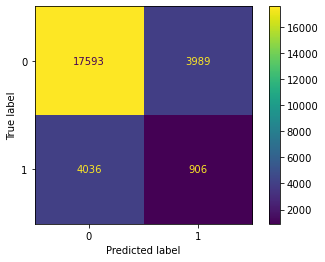

In [119]:
plot_confusion_matrix(clf2,X_train_robus,y_train)       

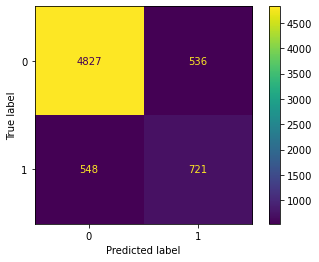

In [69]:
plot_confusion_matrix(clf2,X_test_robus,y_test)

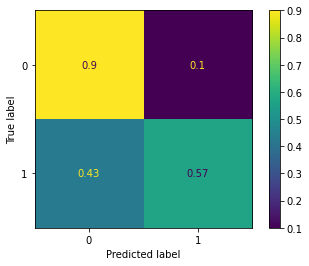

In [70]:
plot_confusion_matrix(clf2,X_test_robus,y_test,normalize='true')

In [71]:
print(classification_report(y_test, clf2.predict(X_test_robus))) 

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      5363
           1       0.57      0.57      0.57      1269

    accuracy                           0.84      6632
   macro avg       0.74      0.73      0.73      6632
weighted avg       0.84      0.84      0.84      6632



In [72]:
cohen_kappa_score(y_test, clf2.predict(X_test_robus))

0.4699159411557122

In [73]:
accuracy_score(y_test, clf2.predict(X_test_robus))

0.8365500603136309

---

# **Oversampling** vs **Undersampling**

In [74]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks,RandomUnderSampler

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17,stratify=y)

## **TomekLinks**

### StandardScaler

In [76]:
tl = TomekLinks()

stan = StandardScaler()


stan.fit(X_train)

X_train_scaled = stan.transform(X_train)

X_test_scaled = stan.transform(X_test)



#Fitting tomelinks onto the dataset
X_train_tl, y_train_tl = tl.fit_resample(X_train_scaled, y_train)


In [77]:
print(len(X_train))

print(len(X_train_tl))  #-----------It's reducing the train sample in 1000 rows aprox

26524
25584


### RobustScaler

In [78]:
robus = RobustScaler()

robus.fit(X_train)

X_train_scaled_robus = robus.transform(X_train)

X_test_scaled_robus = robus.transform(X_test)

In [79]:
X_train_tl_robus, y_train_tl_robus = tl.fit_resample(X_train_scaled_robus, y_train)

---

## **RandomUnderSampler** (Undersampling)

### **LogisticRegression**

#### StandardScaler

In [80]:
r_undersample = RandomUnderSampler()
X_train_ran, y_train_ran = r_undersample.fit_resample(X_train_tl, y_train_tl)

**Train**

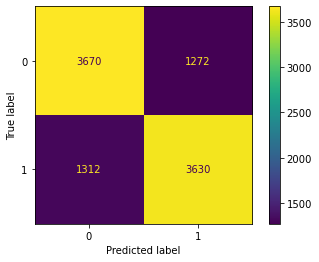

In [81]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(X_train_ran,y_train_ran)

plot_confusion_matrix(log,X_train_ran,y_train_ran)

**Test**

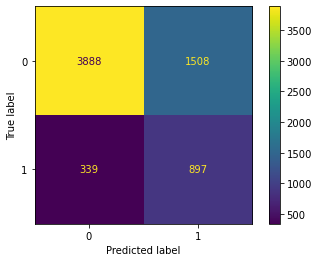

In [82]:
from sklearn.metrics import classification_report
plot_confusion_matrix(log,X_test_scaled,y_test)


In [83]:
cohen_kappa_score(y_test, log.predict(X_test_scaled))

0.32703349618766153

In [84]:
# recall score : tp / tp+fn
# precision score : tp / tp+fp
print(classification_report(y_test, log.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      5396
           1       0.37      0.73      0.49      1236

    accuracy                           0.72      6632
   macro avg       0.65      0.72      0.65      6632
weighted avg       0.82      0.72      0.75      6632



---

#### RobustScaler

In [85]:
r_undersample = RandomUnderSampler()
X_train_ran_robus, y_train_ran_robus = r_undersample.fit_resample(X_train_tl_robus, y_train_tl_robus)

**Test**

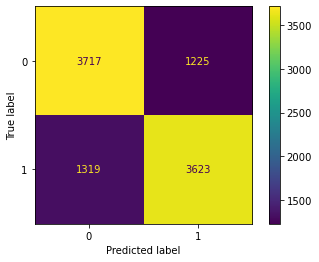

In [86]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

log.fit(X_train_ran_robus,y_train_ran_robus)

plot_confusion_matrix(log,X_train_ran_robus,y_train_ran_robus)

**Test**

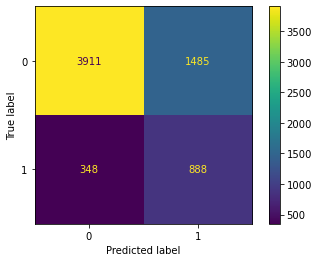

In [87]:
plot_confusion_matrix(log,X_test_scaled_robus,y_test)

In [88]:
cohen_kappa_score(y_test, log.predict(X_test_scaled_robus))

0.3272140667421115

In [89]:
print(classification_report(y_test, log.predict(X_test_scaled_robus)))

              precision    recall  f1-score   support

           0       0.92      0.72      0.81      5396
           1       0.37      0.72      0.49      1236

    accuracy                           0.72      6632
   macro avg       0.65      0.72      0.65      6632
weighted avg       0.82      0.72      0.75      6632



---

### **KNN Neighbors + Robust Scaler**

In [90]:
r_undersample = RandomUnderSampler()
X_train_ran_robus, y_train_ran_robus = r_undersample.fit_resample(X_train_tl_robus, y_train_tl_robus)

In [91]:
from sklearn.neighbors import KNeighborsClassifier

**Train**

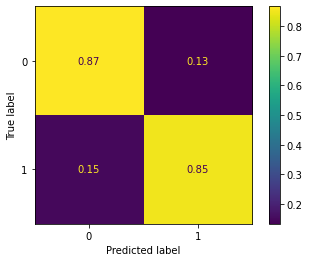

In [92]:
neigh = KNeighborsClassifier(n_neighbors = 3)

neigh.fit(X_train_ran_robus, y_train_ran_robus)

plot_confusion_matrix(neigh,X_train_ran_robus,y_train_ran_robus,normalize='true')

**Test**

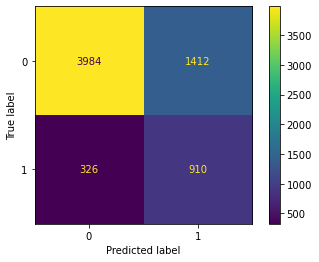

In [93]:
from sklearn.metrics import classification_report
plot_confusion_matrix(neigh,X_test_scaled_robus,y_test)


In [94]:
print(classification_report(y_test, neigh.predict(X_test_scaled_robus))) 

              precision    recall  f1-score   support

           0       0.92      0.74      0.82      5396
           1       0.39      0.74      0.51      1236

    accuracy                           0.74      6632
   macro avg       0.66      0.74      0.67      6632
weighted avg       0.83      0.74      0.76      6632



In [95]:
cohen_kappa_score(y_test, neigh.predict(X_test_scaled_robus)) 

0.3545036835531279

---

### **GradientBoostingClassifier + RobustScaler**

In [96]:
from sklearn.ensemble import GradientBoostingClassifier

In [97]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
     max_depth=1, random_state=0).fit(X_train_ran_robus, y_train_ran_robus)

clf.score(X_test_scaled_robus, y_test)

0.7303980699638118

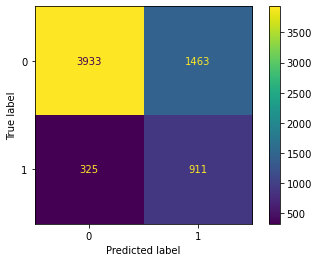

In [98]:
plot_confusion_matrix(clf,X_test_scaled_robus,y_test)

In [99]:
print(classification_report(y_test, clf.predict(X_test_scaled_robus)))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81      5396
           1       0.38      0.74      0.50      1236

    accuracy                           0.73      6632
   macro avg       0.65      0.73      0.66      6632
weighted avg       0.82      0.73      0.76      6632



In [100]:
cohen_kappa_score(y_test, clf.predict(X_test_scaled_robus))

0.3438819648677983

---

### **KNN + GridSearchCV + RobustScaler**

In [101]:
from sklearn.model_selection import GridSearchCV

In [102]:
clf3 = GridSearchCV(KNeighborsClassifier(),{'n_neighbors':list(range(1,20)),'weights':['uniform','distance']},cv=10,scoring='recall')

clf3.fit(X_train_ran_robus,y_train_ran_robus)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19],
                         'weights': ['uniform', 'distance']},
             scoring='recall')

In [103]:
clf3.best_score_

0.7917887375782112

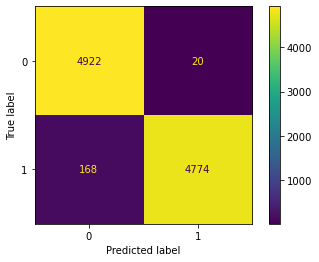

In [118]:
plot_confusion_matrix(clf3,X_train_ran_robus,y_train_ran_robus)             

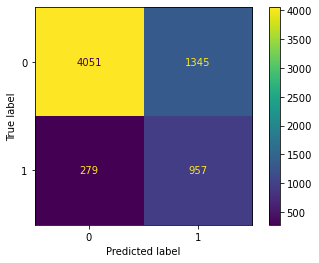

In [104]:
plot_confusion_matrix(clf3,X_test_scaled_robus,y_test)               #-------best confusion matrix

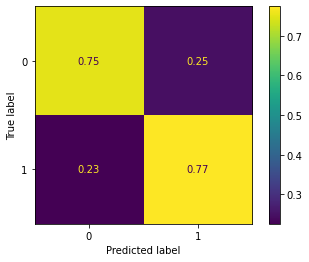

In [105]:
plot_confusion_matrix(clf3,X_test_scaled_robus,y_test,normalize='true')

In [106]:
print(classification_report(y_test, clf3.predict(X_test_scaled_robus)))        #-------best recall predicting 1

              precision    recall  f1-score   support

           0       0.94      0.75      0.83      5396
           1       0.42      0.77      0.54      1236

    accuracy                           0.76      6632
   macro avg       0.68      0.76      0.69      6632
weighted avg       0.84      0.76      0.78      6632



In [107]:
cohen_kappa_score(y_test, clf3.predict(X_test_scaled_robus))      #--------best cohen_kappa_score

0.394020031651666

---

---

## **SMOTE** (oversampling)

In [108]:
smote = SMOTE(random_state=123)
X_train_sm, y_train_sm = smote.fit_resample(X_train_tl, y_train_tl)

### LogisticRegression

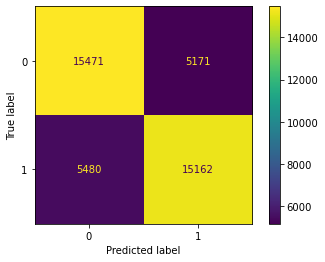

In [109]:
from sklearn.linear_model import LogisticRegression

log2 = LogisticRegression()

log2.fit(X_train_sm,y_train_sm)

plot_confusion_matrix(log2,X_train_sm,y_train_sm)

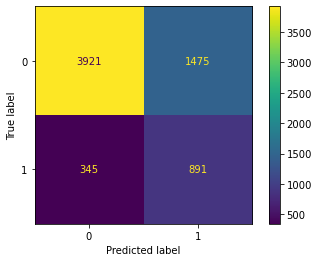

In [110]:
plot_confusion_matrix(log2,X_test_scaled,y_test)

---

### Comparison

Undersampling
Oversampling


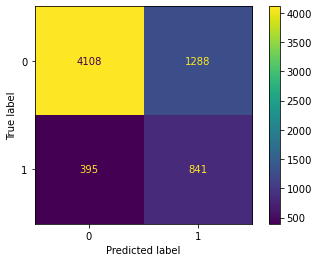

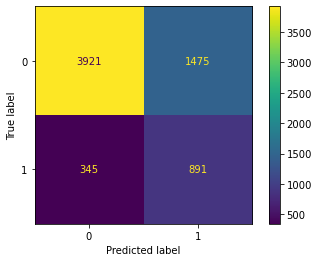

In [111]:
print('Undersampling')        #---------------------------Mejor undersampling
plot_confusion_matrix(log,X_test_scaled,y_test)

print('Oversampling')
plot_confusion_matrix(log2,X_test_scaled,y_test)


In [112]:
cohen_kappa_score(y_test, log2.predict(X_test_scaled))

0.33090727834235933

---

# **Feature importance**

In [113]:
from matplotlib import pyplot

In [114]:
X_test_scaled_robus = pd.DataFrame(X_test_scaled_robus,columns=X.columns)

Feature: 0, Score: 0.07104
Feature: 1, Score: 0.05696
Feature: 2, Score: 0.05971
Feature: 3, Score: 0.01812
Feature: 4, Score: 0.05372
Feature: 5, Score: 0.02282
Feature: 6, Score: 0.00647
Feature: 7, Score: 0.01408
Feature: 8, Score: 0.01327
Feature: 9, Score: 0.00583
Feature: 10, Score: 0.00178
Feature: 11, Score: 0.00939
Feature: 12, Score: 0.00291
Feature: 13, Score: 0.00016
Feature: 14, Score: 0.00129
Feature: 15, Score: -0.00097
Feature: 16, Score: 0.01165
Feature: 17, Score: 0.00809
Feature: 18, Score: 0.00971
Feature: 19, Score: 0.01133
Feature: 20, Score: 0.01117
Feature: 21, Score: 0.00841
Feature: 22, Score: 0.00680
Feature: 23, Score: 0.00307
Feature: 24, Score: 0.00518
Feature: 25, Score: 0.00065
Feature: 26, Score: 0.00922
Feature: 27, Score: 0.02071
Feature: 28, Score: 0.00178
Feature: 29, Score: 0.00324
Feature: 30, Score: 0.07282
Feature: 31, Score: 0.00307
Feature: 32, Score: 0.01812
Feature: 33, Score: 0.01634


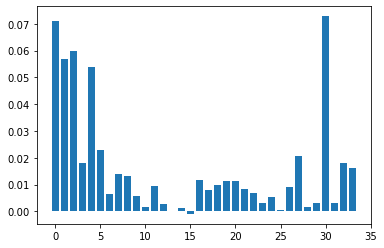

In [116]:
from sklearn.inspection import permutation_importance


results = permutation_importance(clf3,X_test_scaled_robus,y_test, scoring='recall')

# get importance
importance = results.importances_mean

# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#
colnames = list(X_test_scaled_robus.columns)
#0-> Colname_1

ranking = [(abs(v),v,colnames[i]) for i,v in enumerate(importance)]
ranking.sort(reverse = True)

In [117]:
ranking

[(0.07281553398058253, 0.07281553398058253, 'Channel_MICE'),
 (0.0710355987055016, 0.0710355987055016, 'Arrival month'),
 (0.05970873786407764, 0.05970873786407764, 'Lead time'),
 (0.05695792880258901, 0.05695792880258901, 'Length of the stay'),
 (0.053721682847896426, 0.053721682847896426, 'Non Refundable'),
 (0.022815533980582513, 0.022815533980582513, 'VIP'),
 (0.02071197411003236, 0.02071197411003236, 'Market channel_TTOO'),
 (0.018122977346278324, 0.018122977346278324, 'N of pax'),
 (0.018122977346278324, 0.018122977346278324, 'Channel_WEB'),
 (0.01634304207119739, 0.01634304207119739, 'Channel_XML'),
 (0.014077669902912615, 0.014077669902912615, 'Stay type_L-W-L'),
 (0.013268608414239469, 0.013268608414239469, 'Stay type_W-L'),
 (0.011650485436893199, 0.011650485436893199, 'Meal_RO'),
 (0.011326860841423935, 0.011326860841423935, 'Country_Spain'),
 (0.011165048543689294, 0.011165048543689294, 'Country_United Kingdom'),
 (0.009708737864077666, 0.009708737864077666, 'Country_Other'

In [120]:
total = 0

for i in range(len(ranking)):
    total += ranking[i][0]

ranking2 = [ (elem[2],elem[0]/total) for elem in ranking]
ranking2

[('Channel_MICE', 0.1300578034682082),
 ('Arrival month', 0.12687861271676307),
 ('Lead time', 0.10664739884393064),
 ('Length of the stay', 0.10173410404624285),
 ('Non Refundable', 0.09595375722543356),
 ('VIP', 0.04075144508670521),
 ('Market channel_TTOO', 0.03699421965317921),
 ('N of pax', 0.032369942196531824),
 ('Channel_WEB', 0.032369942196531824),
 ('Channel_XML', 0.029190751445086684),
 ('Stay type_L-W-L', 0.025144508670520236),
 ('Stay type_W-L', 0.023699421965317907),
 ('Meal_RO', 0.0208092485549133),
 ('Country_Spain', 0.02023121387283236),
 ('Country_United Kingdom', 0.01994219653179187),
 ('Country_Other', 0.017341040462427747),
 ('Room type_Double Standard', 0.016763005780346812),
 ('Market channel_OTA', 0.01647398843930636),
 ('Country_United States', 0.015028901734104075),
 ('Country_Germany', 0.014450867052023138),
 ('Market channel_Direct / Walk-in', 0.012138728323699425),
 ('Stay type_L-W', 0.011560693641618486),
 ('Stay type_W-W', 0.01040462427745661),
 ('Market 